<a href="https://colab.research.google.com/github/Annette98/Data-Science-and-Machine-Learning-Projects/blob/main/LINEAR_REGRESSION_ON_FUEL_CONSUMPTION_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FUEL CONSUMPTION

The fuel consumption dataset, **`FuelConsumption.csv`**,contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

#### DESCRIPTION

The aim of this project is to perform simple linear regression to understand the relationship that exist between the vehicle variables and carbon dioxide emission.


In [1]:
#importing necessary libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#getting data

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-03-06 14:22:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2024-03-06 14:22:48 (1.15 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   185k      0 --:--:-- --:--:-- --:--:--  185k


In [4]:
#load dataset into a dataframe 'df'
df = pd.read_csv("FuelConsumption.csv")

# display few rows of the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### DATA EXPLORATION

In [5]:
#view basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


It is observed that there are no null values in dataset

In [6]:
#view descriptive stastistics about the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
#display all columns

df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
#Rename columns so they are all in snake_case

df = df.rename(columns = {'MODELYEAR':'model_year', 'MODEL':'model', 'VEHICLECLASS':'vehicle_class', 'ENGINESIZE':'engine_size',
                          'CYLINDERS':'cylinders', 'TRANSMISSION':'transmission', 'FUELTYPE':'fuel_type', 'FUELCONSUMPTION_CITY':
                          'fuel_consumption_city', 'FUELCONSUMPTION_HWY':'fuel_consumption_hwy',
                          'FUELCONSUMPTION_COMB':'fuel_consumption_comb', 'FUELCONSUMPTION_COMB_MPG':'fuel_consumption_comb_mpg',
                          'CO2EMISSIONS':'CO2_emissions'
                         })

#view columns
df.columns

Index(['model_year', 'MAKE', 'model', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'CO2_emissions'],
      dtype='object')

In [9]:
#check for missing values
df.isna().sum()

model_year                   0
MAKE                         0
model                        0
vehicle_class                0
engine_size                  0
cylinders                    0
transmission                 0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
CO2_emissions                0
dtype: int64

This further verifies that there are no missing values in the dataset

In [10]:
# Check for duplicates
df.duplicated().sum()

0

In [11]:
#selecting relevant numerical features to explore
cdf = df[['engine_size','cylinders','fuel_consumption_comb','CO2_emissions']]
cdf.head()

,engine_size,cylinders,fuel_consumption_comb,CO2_emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


We can plot each feature using histogram to better understand distribution of data.

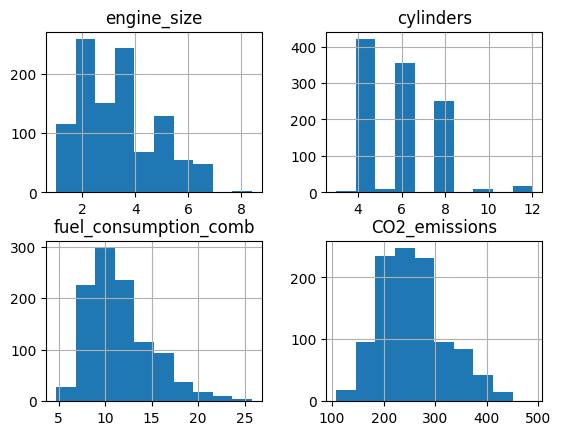

In [12]:
viz = cdf[['engine_size','cylinders','fuel_consumption_comb','CO2_emissions']]
viz.hist()
plt.show()

Ploting each of these features against the Emission, to see how linear their relationship is

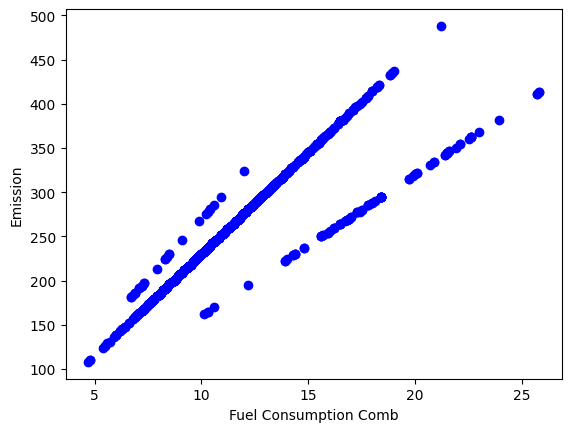

In [13]:
plt.scatter(cdf.fuel_consumption_comb, cdf.CO2_emissions,  color='blue')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")
plt.show()

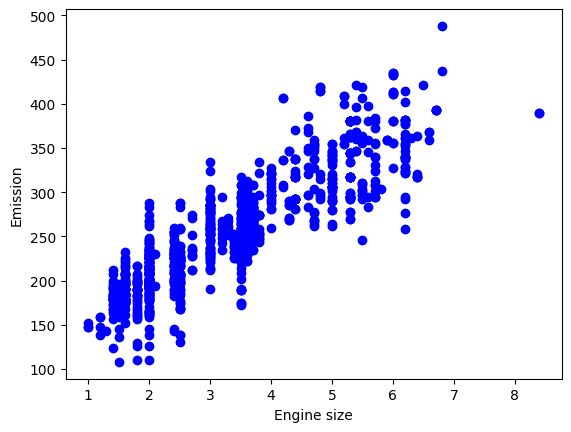

In [14]:
plt.scatter(cdf.engine_size, cdf.CO2_emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

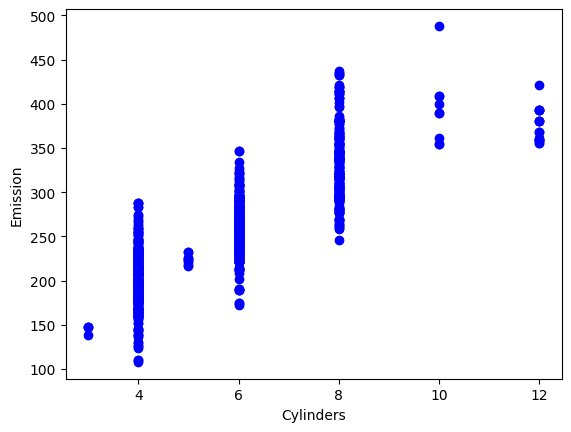

In [15]:
plt.scatter(cdf.cylinders, cdf.CO2_emissions,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Creating a plot of pairwise relationships in the data. This will help to better visualize the relationships and check model assumptions.

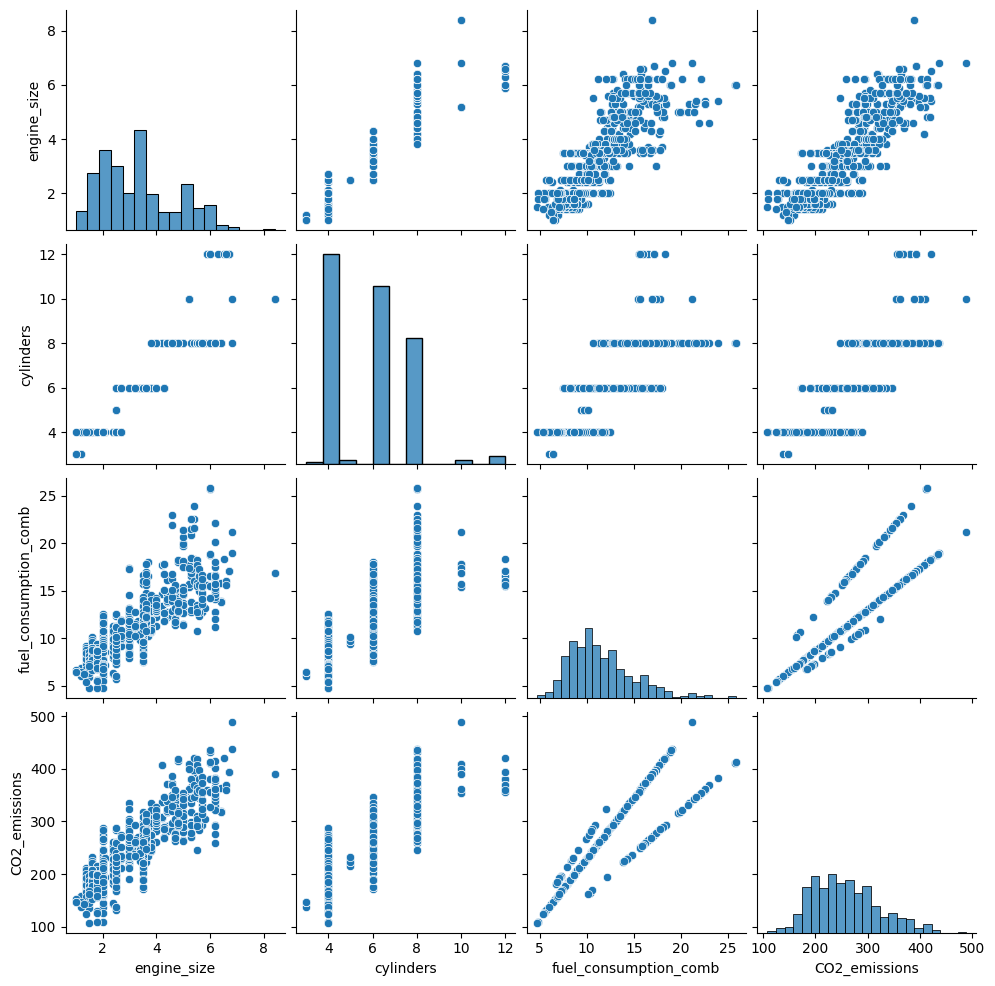

In [16]:
sns.pairplot(cdf)

In the scatter plot of Engine size over CO2 emissions, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

#### MODEL BUILDING

The model will be built using the Ordinary Least Squares(OLS) approach for linear regression

In [17]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

ols_data = cdf[['engine_size', 'CO2_emissions']]

In [18]:
#Display first 10 rows of the new dataframe

ols_data.head()

,engine_size,CO2_emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [19]:
#using the linear regression formular to model the relationship between the two variables

ols_formula = 'CO2_emissions ~ engine_size'

In [20]:
# Implement OLS.

OLS = ols(formula = ols_formula, data = ols_data)

In [21]:
#fitting the model

model = OLS.fit()

#### RESULTS AND EVALUATION

In [22]:
#get summary of the results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_emissions   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:22:57   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     125.3041      2.420     51.779      0.000     120.556     130.053
engine_size    39.1252      0.666     58.741      0.000      37.818      40.432
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.126   Prob(JB):                     1.71e-12
Kurtosis:                       4.075   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, analyze the bottom table from the results summary. Based on the table, identify the co-
efficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope.

***The y-intercept is 125.3041***

***The slope is 39.1252***

Using the form of y = slope * x + y-intercept, the linear equation to express the relationship between CO2 emissions and Engine size is:

**CO2_emissions = 39.1252 * engine_size + 125.3041**

What does the slope mean in this context?


An interpretation would be; If the engine size of a vehicle is 1, the CO2_emission from that vehicle would increase by 39.1252.

Now that the linear regression model have been built and fit it to the data, finish checking the model assumptions. This will help confirm the findings.

The assumptions for linear regression are:
* Linearity
* Normality
* Independent Observation
* Homoscedasticity


First, plot the OLS data with the best fit regression line.

<Axes: xlabel='engine_size', ylabel='CO2_emissions'>

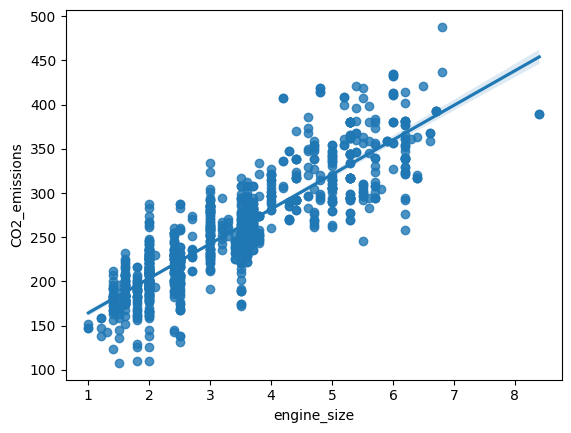

In [23]:
# Plot the OLS data with the best fit regression line.

sns.regplot(x = 'engine_size', y = 'CO2_emissions', data = ols_data)

The preceding regression plot illustrates an approximately linear relationship between the
two variables along with the best fit line. This confirms the assumption of linearity.

Now, checking the normality assumption. Get the residuals from the model.

In [24]:
# Get the residuals from the model.

residuals = model.resid

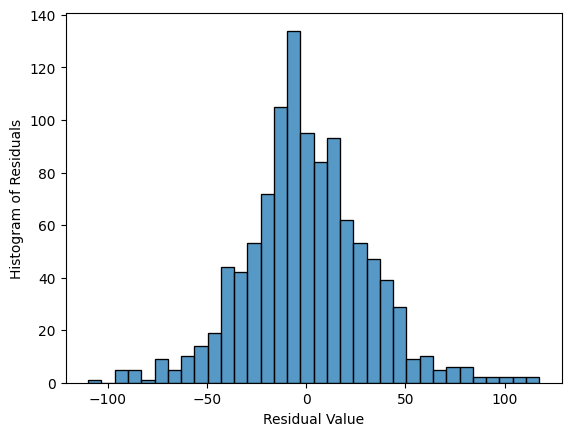

In [25]:
# Visualize the distribution of the residuals.
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_ylabel('Histogram of Residuals')
plt.show()

Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

Next, creating a Q-Q plot to confirm the assumption of normality.

<function matplotlib.pyplot.show(close=None, block=None)>

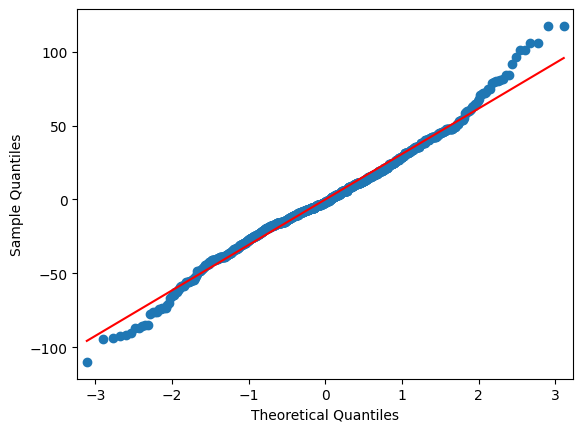

In [26]:
# Create a Q-Q plot.
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show

In the preceding Q-Q plot, the points closely follow a straight diagonal line trending upward.
This confirms that the normality assumption is met.

Now, checking the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [27]:
# Get fitted values.

x = ols_data['engine_size']
fitted_values = model.predict(x)

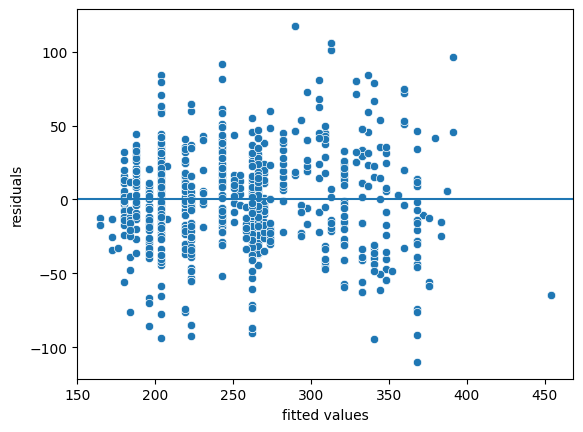

In [28]:
# Creating a scatterplot of residuals against fitted values.
fig = sns.scatterplot(x=fitted_values, y = residuals)
fig.axhline(0)
fig.set_xlabel('fitted values')
fig.set_ylabel('residuals')
plt.show()

In the preceding scatterplot, the data points have a cloud-like resemblance and do not follow an explicit pattern. So it appears that the independent observation assumption has not been violated. Given that the residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

#### CONCLUSION

In the simple linear regression model, the y-intercept is 125.3041 and the slope is 39.1252. An interpretation would be; If the engine size of a vehicle is 1, the CO2 emission from that vehicle would increase by 39.1252.

The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true.

In this context, the null hypothesis is that there is no relationship between engine size and CO2 emissions i.e. the slope is zero, and the alternative hypothesis is that there is a relationship
between engine size and CO2 emissions i.e. the slope is not zero. So, we could reject the null hypothesis and state that there is a relationship between engine size and CO2 emission for vehicles in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value).


The 95% confidence interval for the slope is from 37.818 to 40.432. This indicates that there is a 95% probability that the interval [37.818, 40.432] contains the true value for the slope.

#### SUMMARY

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between Engine size and CO2 emissions, with a **p-value of 0.000** and **standard error of 0.666**.

For vehicles represented by this data, if the engine size of a vehicle is 1, the CO2 emission from that vehicle would increase by 39.1252. This means that larger engine size would produce more CO2 emissions.

Also, it is recommended to consider further examining the relationship between the two variables in different contexts. For example, it would help to gather more data to understand whether this relationship is different in other countries or other vehicle-make not listed in the dataset.